In [1]:
#importing libraries 
import numpy as np
import pandas as pd 

In [2]:
#import dataset
rawdata =  pd.read_csv("SMSSpamCollection[1]",sep='\t',names=['labels','sms'])

The dataset we chose isn't seperated by comma instead its seperated by a tab.so,we mentioned 'sep' in above 
And seperated the attributes into labels and sms

In [3]:
rawdata

,labels,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
#its good that dataset doesnt has any null entry 
rawdata.describe()

,labels,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


we can see that labels are filled with just two entities(i.e HAM , SPAM) and HAM is repeated 4825 times

In [6]:
#mappping ham to 0 and spam to 1
rawdata['labels']=rawdata['labels'].map({'ham':0,'spam':1})
rawdata

,labels,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

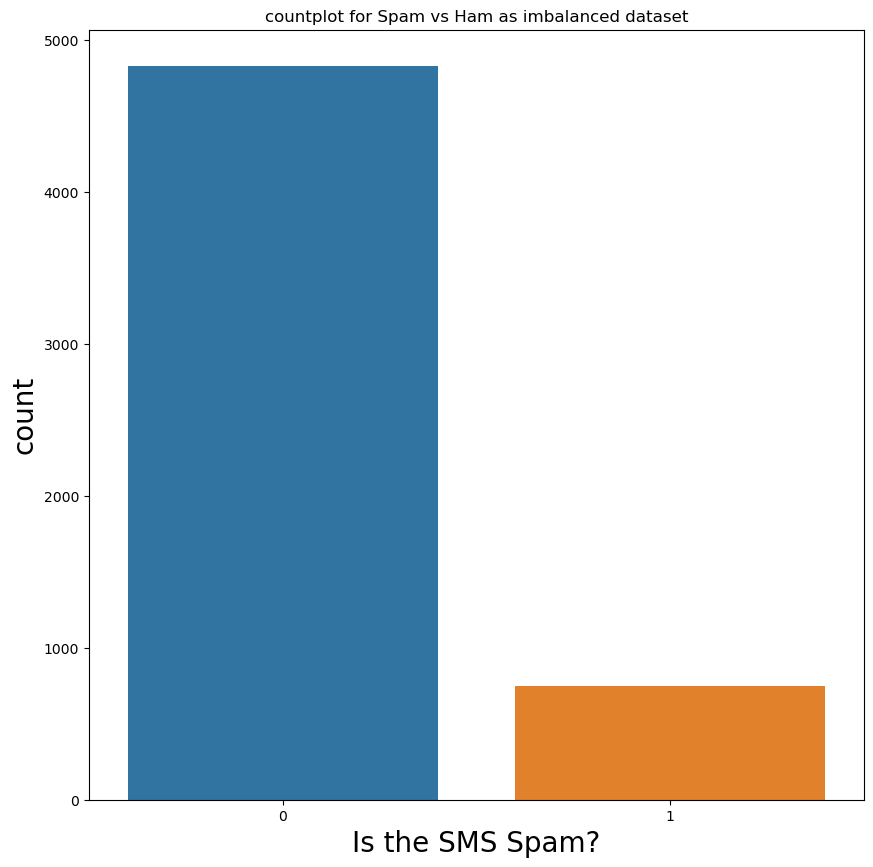

In [8]:
#countplot for Spam vs Ham as imbalanced dataset
plt.figure(figsize=(10,10))
g=sns.countplot(x='labels',data=rawdata)
p=plt.title("countplot for Spam vs Ham as imbalanced dataset")
p=plt.xlabel("Is the SMS Spam?",fontsize=20)
p=plt.ylabel("count",fontsize=20)

In [9]:
#handling imbalnced dataset using oversampling
#seperating spam sms 
only_spam=rawdata[rawdata['labels']==1]
only_spam

,labels,sms
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [10]:
print("No. of Spam SMS:", len(only_spam))
print("No. of Ham SMS:", len(rawdata)- len(only_spam))

No. of Spam SMS: 747
No. of Ham SMS: 4825


In [11]:
#we can clearly see the difference sample sizes of spam and ham 
count=int((rawdata.shape[0]-only_spam.shape[0])/only_spam.shape[0])
count

6

In [12]:
# it means spam samplesize is 6 times the ham sample size
for i in range(0,count-1):
    rawdata=pd.concat([rawdata,only_spam])
rawdata

,labels,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


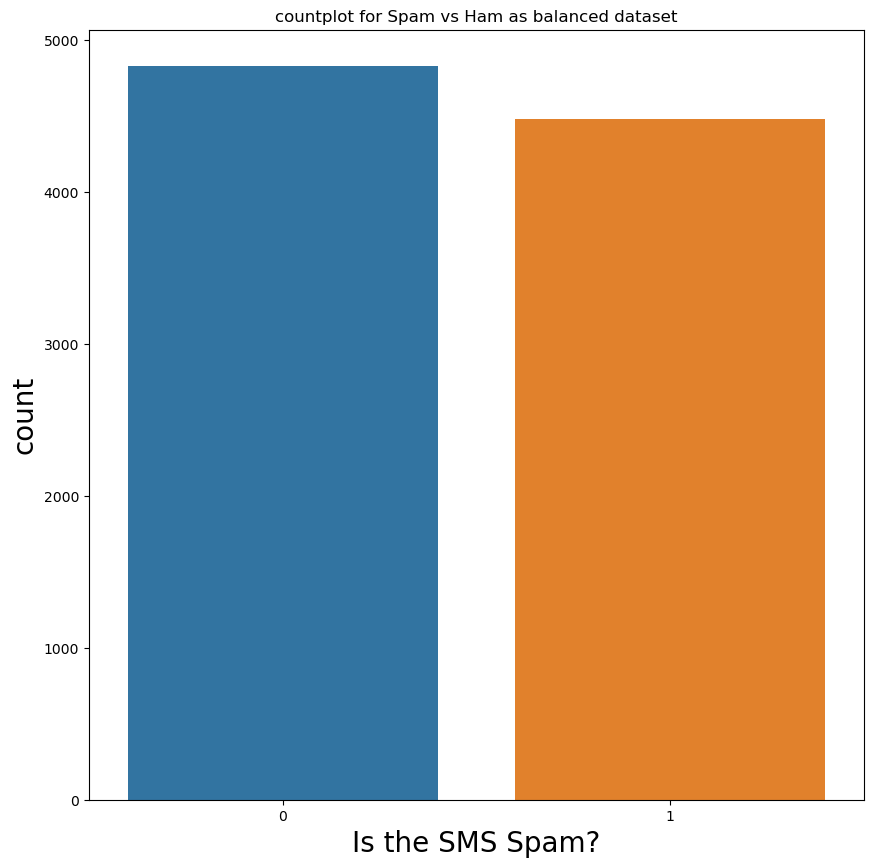

In [13]:
#countplot for Spam vs Ham as balanced dataset
plt.figure(figsize=(10,10))
g=sns.countplot(x='labels',data=rawdata)
p=plt.title("countplot for Spam vs Ham as balanced dataset")
p=plt.xlabel("Is the SMS Spam?",fontsize=20)
p=plt.ylabel("count",fontsize=20)

In [14]:
#creating new feature for counting the words 
rawdata["word_count"]=rawdata['sms'].apply(lambda x:len(x.split()))
rawdata

,labels,sms,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


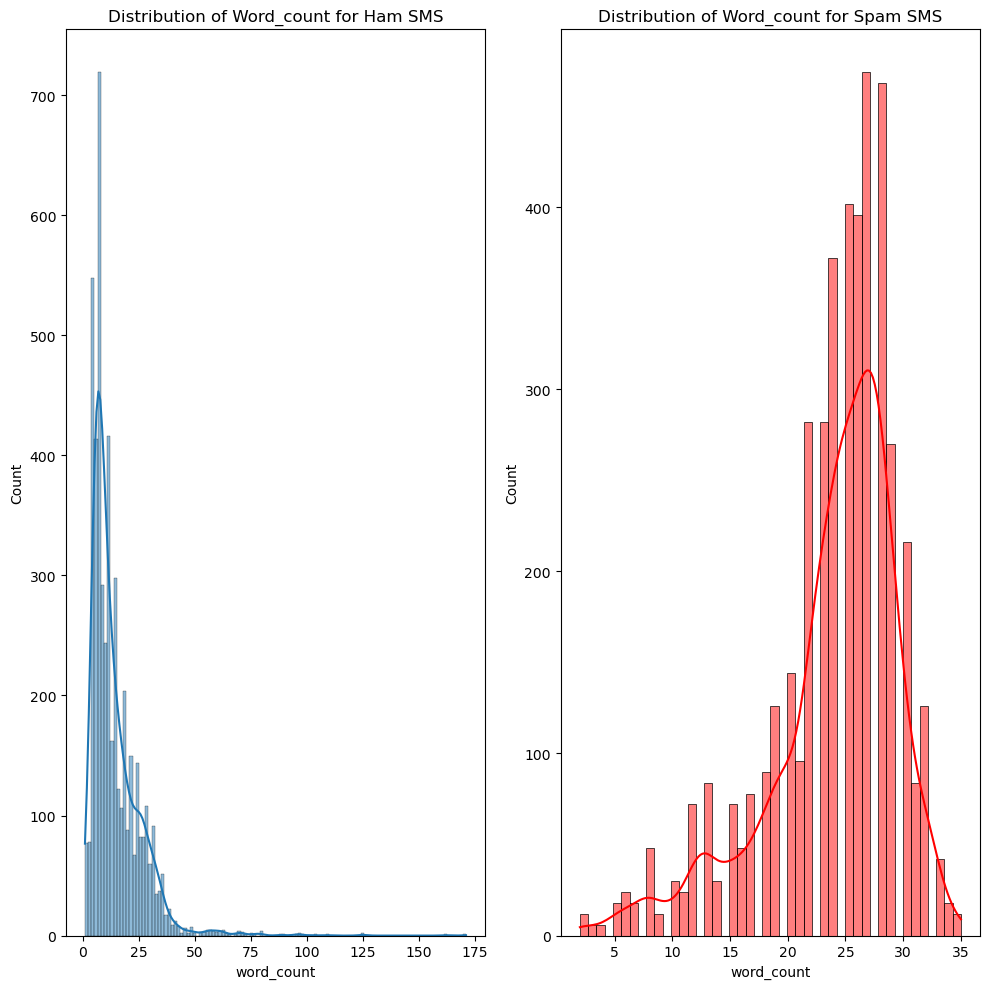

In [15]:
plt.figure(figsize=(10,10))

#subplot(1,1)
plt.subplot(1,2,1)
g=sns.histplot(rawdata[rawdata['labels']==0].word_count,kde=True)
p=plt.title("Distribution of Word_count for Ham SMS")

#subplot(1,1)
plt.subplot(1,2,2)
g=sns.histplot(rawdata[rawdata['labels']==1].word_count,color="red",kde=True)
p=plt.title("Distribution of Word_count for Spam SMS")
 
plt.tight_layout()
plt.show()

In [16]:
#so,we see that wordcount exceeding 35 were more likely to be HAM and SPAM message were likelly to be of a length of 20 to 30 

In [17]:
#creating new feature of containing currency symbols
def currency(data):
    currency_symbols=['$','€' ,'£','¥','₣','₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [18]:
rawdata['contains_currency_symbols']=rawdata['sms'].apply(currency)
rawdata

,labels,sms,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


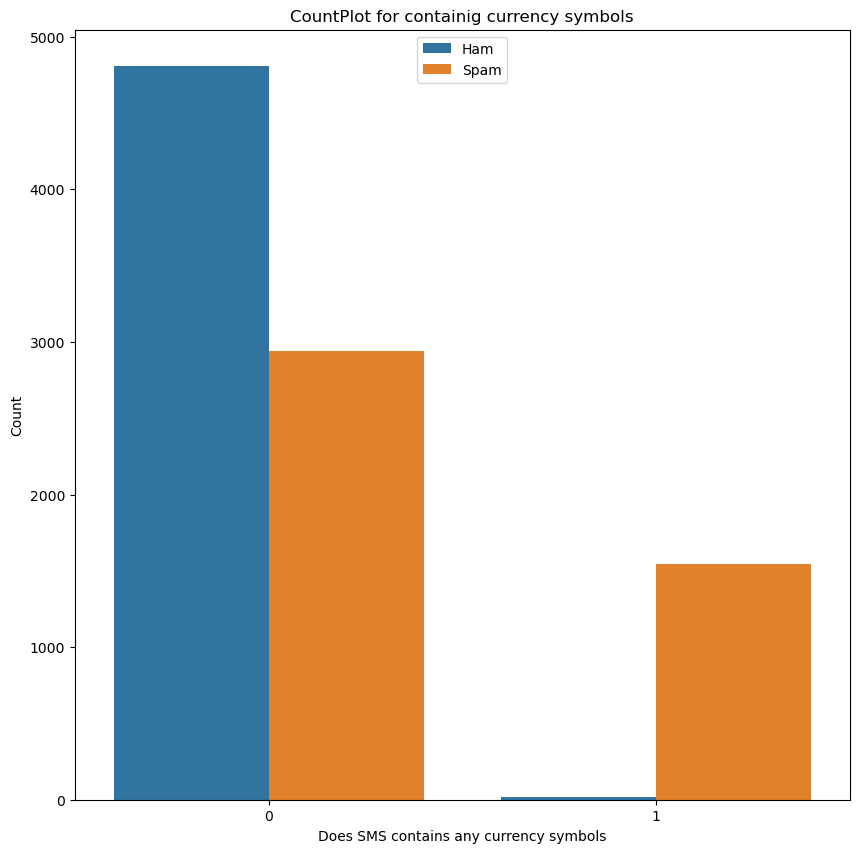

In [19]:
#countplot for contains_currency_symbols
plt.figure(figsize=(10,10))
g=sns.countplot(x="contains_currency_symbols",data=rawdata,hue="labels")
p=plt.title("CountPlot for containig currency symbols")
p=plt.xlabel("Does SMS contains any currency symbols")
p=plt.ylabel('Count')
p=plt.legend(labels=['Ham','Spam'],loc=9)

In [20]:
#we can see that ham messgase dont oftenly contains currency symbols than spam messages does

In [21]:
#creating new feature of containing numbers
def number(data):
    for i in data:
        if ord(i) >= 48 and ord(i) <= 57:
            return 1
    return 0

In [22]:
rawdata["contains_numbers"]=rawdata["sms"].apply(number)
rawdata

,labels,sms,word_count,contains_currency_symbols,contains_numbers
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


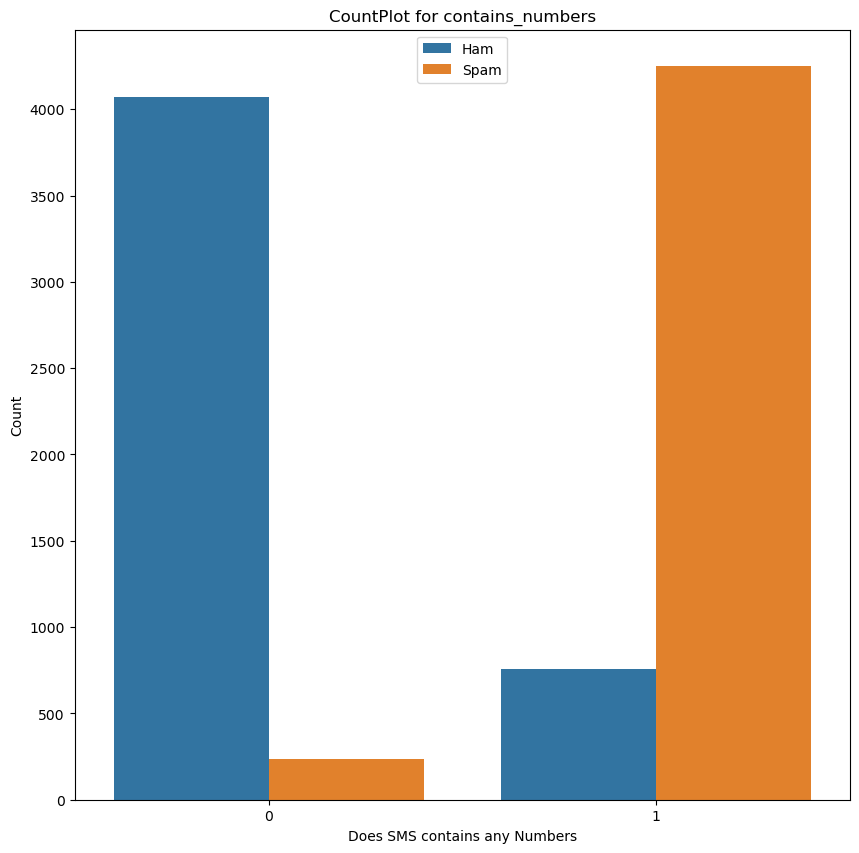

In [23]:
#countplot for containing numbers
plt.figure(figsize=(10,10))
g=sns.countplot(x="contains_numbers",data=rawdata,hue="labels")
p=plt.title("CountPlot for contains_numbers")
p=plt.xlabel("Does SMS contains any Numbers")
p=plt.ylabel('Count')
p=plt.legend(labels=['Ham','Spam'],loc=9)


In [24]:
#Data cleaning 
import nltk 
import re 
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
corpus=[]
wnl=WordNetLemmatizer()

for message in list(rawdata.sms):
    msg=re.sub(pattern="[^a-zA-Z]",repl=' ',string=message)
    msg=msg.lower()
    words=msg.split()#TOKENIZER 
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    message=" ".join(lemm_words)
    
    corpus.append(message)
        
        
    

In [26]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [27]:
#creating the bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=500)
vectors=tfidf.fit_transform(corpus).toarray()
feature_names=tfidf.get_feature_names_out()

In [28]:
x=pd.DataFrame(vectors,columns=feature_names)
y=rawdata['labels']

In [29]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=44)

In [31]:
x_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
3904,0.0,0.0,0.0,0.0,0.0,0.0,0.409158,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2322,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1095,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5655,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
517,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.313038,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2144,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3971,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
571,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#Naive bayes model 
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
cv=cross_val_score(mnb,x,y,scoring="f1",cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.943
0.004


In [33]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       970
           1       0.93      0.93      0.93       892

    accuracy                           0.93      1862
   macro avg       0.93      0.93      0.93      1862
weighted avg       0.93      0.93      0.93      1862



In [35]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[911,  59],
       [ 64, 828]], dtype=int64)

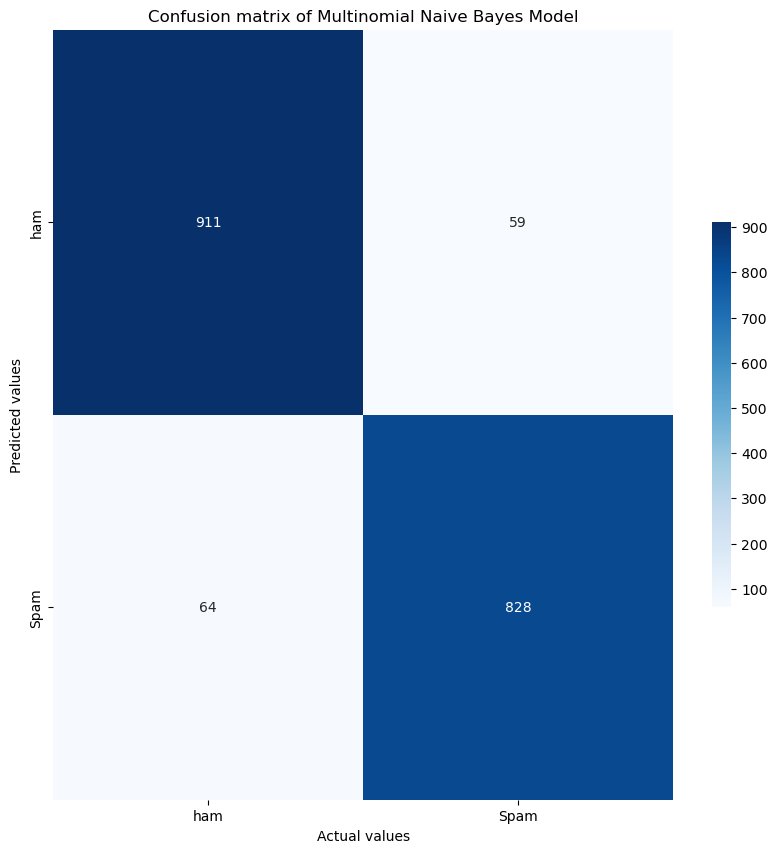

In [36]:
plt.figure(figsize=(10,10))
axis_labels=['ham','Spam']
g=sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,fmt="g",cbar_kws={"shrink":0.5},cmap="Blues")
p=plt.title("Confusion matrix of Multinomial Naive Bayes Model")
p=plt.xlabel("Actual values")
p=plt.ylabel("Predicted values")

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
cv1=cross_val_score(dt,x,y,scoring="f1",cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.98
0.003


In [38]:
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)

In [39]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       970
           1       0.97      1.00      0.98       892

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [40]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[939,  31],
       [  2, 890]], dtype=int64)

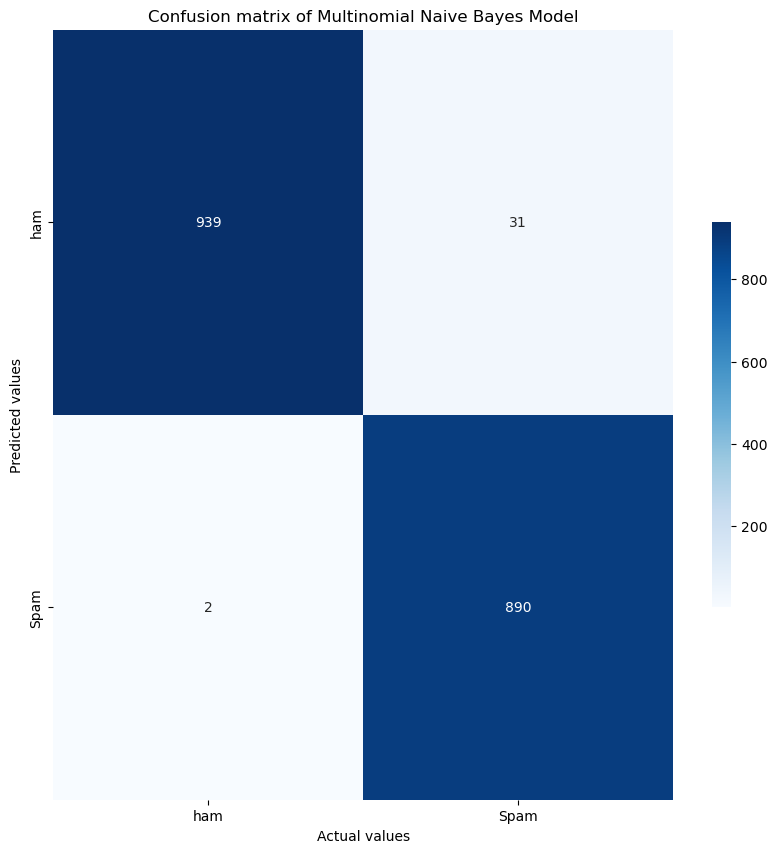

In [41]:
plt.figure(figsize=(10,10))
axis_labels=['ham','Spam']
g=sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,fmt="g",cbar_kws={"shrink":0.5},cmap="Blues")
p=plt.title("Confusion matrix of Multinomial Naive Bayes Model")
p=plt.xlabel("Actual values")
p=plt.ylabel("Predicted values")

In [42]:
def predict_spam(message):
    msg=re.sub(pattern="[^a-zA-Z]",repl=' ',string=message)
    msg=msg.lower()
    words=msg.split()#TOKENIZER 
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    message=" ".join(lemm_words)
    temp=tfidf.transform([message]).toarray()
    return mnb.predict(temp)
        
    

In [43]:
#prediction 
sample_message='Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

if predict_spam(sample_message):
    print("YEAH!!! Its a spam message")
else:
    print("NO, Its a Normal meaage")

NO, Its a Normal meaage


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [44]:
#prediction 
sample_message="Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's'"

if predict_spam(sample_message):
    print("YEAH!!! Its a spam message")
else:
    print("NO, Its a Normal meaage")

YEAH!!! Its a spam message


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
